# Pokemon Classifier
A Convolutional Neural Network (CNN) designed to detect multiple Pokemon in a given image. The model is trained on a dataset containing various Pokemon characters and can identify multiple Pokemon in a single image.


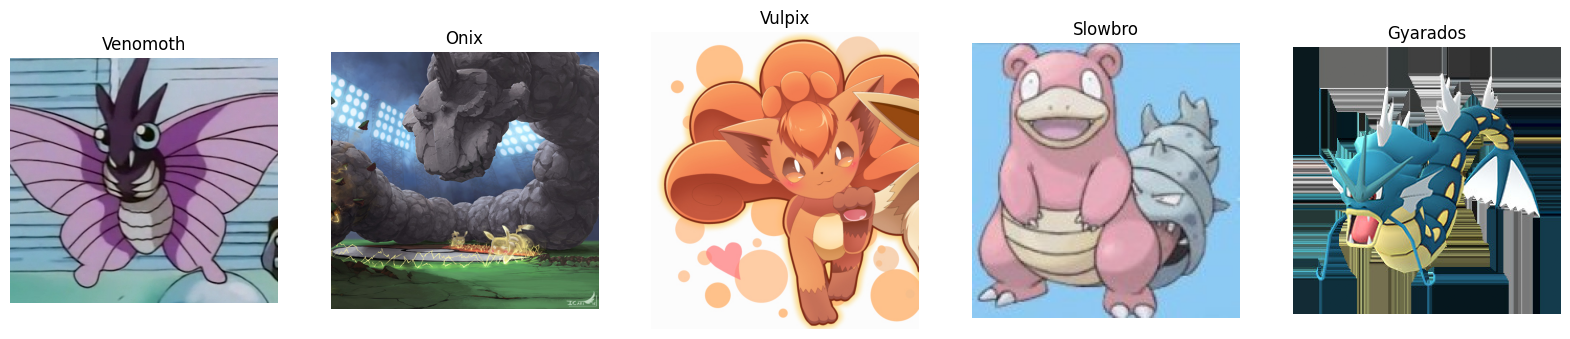

In [165]:
# Start off by randomly picking images from the training set and displaying them with a Unknown label at the bottom
import os
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

training_directory = 'data/training_set'
testing_directory = 'data/testing_set'

#plot 5 Pokemon as subplots together, turn off axis, normal colors
fig, ax = plt.subplots(1, 5, figsize=(20, 20))
for i in range(5):
    random_pokemon = random.choice(os.listdir(training_directory))
    random_pokemon_image = random.choice(os.listdir(training_directory + '/' + random_pokemon))
    img = mpimg.imread(training_directory + '/' + random_pokemon + '/' + random_pokemon_image)
    ax[i].set_title(random_pokemon)
    ax[i].axis('off')
    ax[i].imshow(img)

In [166]:
os.chdir("data/images")
poke_list = os.listdir()

poke_dict = {string: index for index, string in enumerate(poke_list)}
print(poke_dict)
os.chdir('..')
os.chdir('..')

{'Abra': 0, 'Aerodactyl': 1, 'Alakazam': 2, 'Alolan Sandslash': 3, 'Arbok': 4, 'Arcanine': 5, 'Articuno': 6, 'Beedrill': 7, 'Bellsprout': 8, 'Blastoise': 9, 'Bulbasaur': 10, 'Butterfree': 11, 'Caterpie': 12, 'Chansey': 13, 'Charizard': 14, 'Charmander': 15, 'Charmeleon': 16, 'Clefable': 17, 'Clefairy': 18, 'Cloyster': 19, 'Cubone': 20, 'Dewgong': 21, 'Diglett': 22, 'Ditto': 23, 'Dodrio': 24, 'Doduo': 25, 'Dragonair': 26, 'Dragonite': 27, 'Dratini': 28, 'Drowzee': 29, 'Dugtrio': 30, 'Eevee': 31, 'Ekans': 32, 'Electabuzz': 33, 'Electrode': 34, 'Exeggcute': 35, 'Exeggutor': 36, 'Farfetchd': 37, 'Fearow': 38, 'Flareon': 39, 'Gastly': 40, 'Gengar': 41, 'Geodude': 42, 'Gloom': 43, 'Golbat': 44, 'Goldeen': 45, 'Golduck': 46, 'Golem': 47, 'Graveler': 48, 'Grimer': 49, 'Growlithe': 50, 'Gyarados': 51, 'Haunter': 52, 'Hitmonchan': 53, 'Hitmonlee': 54, 'Horsea': 55, 'Hypno': 56, 'Ivysaur': 57, 'Jigglypuff': 58, 'Jolteon': 59, 'Jynx': 60, 'Kabuto': 61, 'Kabutops': 62, 'Kadabra': 63, 'Kakuna': 64, 

In [167]:
from PIL import Image
#use sklearn to create  CNN
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

def resize_image(image_path):
    with Image.open(image_path) as img:
        if img.mode != 'RGB':
            img = img.convert('RGB')
        img = img.resize((64, 64))
        return np.array(img)

#create sklearn model to classify pokemon images
model = MLPClassifier(
    hidden_layer_sizes=(100, 100, 100),
    max_iter=500,
    alpha=0.001,
    solver='sgd',
    verbose=0,
    random_state=21,
    tol=0.000000001
)

#loop through creating dataset that contains [label, path_to_image]
dataset = []
#test with 100 images
for i in os.listdir(training_directory):
    random_pokemon = random.choice(os.listdir(training_directory))
    random_pokemon_image = random.choice(os.listdir(training_directory + '/' + random_pokemon))
    img = resize_image(training_directory + '/' + random_pokemon + '/' + random_pokemon_image)
    dataset.append([random_pokemon, img])
    
    
# place training data into x and labels into y
labels = [x[0] for x in dataset]
images = [x[1] for x in dataset]
labels = [poke_dict[item] for item in labels]

# Convert lists to NumPy arrays
y = np.array(labels)
x = np.array(images)

# Normalize pixel values if necessary (e.g., if your images are in color)
x = x / 255.0

# Flatten the image arrays for the MLP input
x = x.reshape(x.shape[0], -1)

print(f'x.shape: {x.shape}')
# 100 images, 12288 features
# the 12288 features are the 64px X 64px X 3 color channels (RGB)
print(f'y.shape: {y.shape}')
# 100 labels, one for each image


# split data into training and testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20)

x_train = x_train.reshape(x_train.shape[0],64,64,3)
x_test = x_test.reshape(x_test.shape[0], 64, 64, 3)
print(x_train)
print(y_train)


x.shape: (119, 12288)
y.shape: (119,)
[[[[1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   ...
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]]

  [[1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   ...
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]]

  [[1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   ...
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]]

  ...

  [[1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   ...
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]]

  [[1. 

In [168]:
import tensorflow as tf
from keras.layers import Dropout
from keras.layers import MaxPooling2D
from keras.layers import Conv2D
from keras.layers import BatchNormalization
from tensorflow.keras import datasets, layers, models

model = models.Sequential()
model.add(Conv2D(32, (5, 5), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(64, 64, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))

# model.add(Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
# model.add(MaxPooling2D((2, 2)))
# model.add(Dropout(0.2))

model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_33 (Conv2D)          (None, 64, 64, 32)        2432      
                                                                 
 max_pooling2d_33 (MaxPooli  (None, 32, 32, 32)        0         
 ng2D)                                                           
                                                                 
 dropout_53 (Dropout)        (None, 32, 32, 32)        0         
                                                                 
 conv2d_34 (Conv2D)          (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d_34 (MaxPooli  (None, 16, 16, 64)        0         
 ng2D)                                                           
                                                                 
 dropout_54 (Dropout)        (None, 16, 16, 64)      

In [169]:
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(Dropout(0.2))
# model.add(layers.Dense(256, activation='relu'))
# model.add(Dropout(0.2))
model.add(layers.Dense(151, activation='softmax'))

model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_33 (Conv2D)          (None, 64, 64, 32)        2432      
                                                                 
 max_pooling2d_33 (MaxPooli  (None, 32, 32, 32)        0         
 ng2D)                                                           
                                                                 
 dropout_53 (Dropout)        (None, 32, 32, 32)        0         
                                                                 
 conv2d_34 (Conv2D)          (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d_34 (MaxPooli  (None, 16, 16, 64)        0         
 ng2D)                                                           
                                                                 
 dropout_54 (Dropout)        (None, 16, 16, 64)      

In [170]:
sgd = tf.keras.optimizers.experimental.SGD(
    learning_rate=0.001,
    momentum=0.9)

model.compile(#optimizer=sgd,
              optimizer='adam',
              #optimizer = keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=10,
                    batch_size=2,
                    validation_data=(x_test, y_test), verbose=0)


c:\Users\scran\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\backend.py:5729: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


In [171]:
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

print(test_acc)

1/1 - 1s - loss: 7.3937 - accuracy: 0.0833 - 678ms/epoch - 678ms/step
0.0833333358168602


1/1 [==============================] - 0s 319ms/step


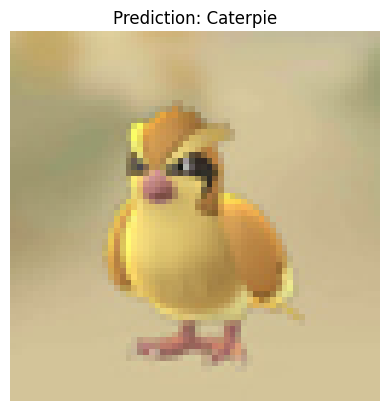

Accuracy for class: Abra         is 0.0 %
Accuracy for class: Aerodactyl   is 0.0 %
Accuracy for class: Alakazam     is 0.0 %
Accuracy for class: Alolan Sandslash is 0.0 %
Accuracy for class: Arbok        is 0.0 %
Accuracy for class: Arcanine     is 0.0 %
Accuracy for class: Articuno     is 0.0 %
Accuracy for class: Beedrill     is 0.0 %
Accuracy for class: Bellsprout   is 0.0 %
Accuracy for class: Blastoise    is 0.0 %
Accuracy for class: Bulbasaur    is 0.0 %
Accuracy for class: Butterfree   is 0.0 %
Accuracy for class: Caterpie     is 0.0 %
Accuracy for class: Chansey      is 0.0 %
Accuracy for class: Charizard    is 0.0 %
Accuracy for class: Charmander   is 0.0 %
Accuracy for class: Charmeleon   is 0.0 %
Accuracy for class: Clefable     is 0.0 %
Accuracy for class: Clefairy     is 0.0 %
Accuracy for class: Cloyster     is 0.0 %
Accuracy for class: Cubone       is 0.0 %
Accuracy for class: Dewgong      is 0.0 %
Accuracy for class: Diglett      is 0.0 %
Accuracy for class: Ditto     

In [172]:
import sys

def summarize_diagnostics(history):
 # plot loss
 plt.subplot(211)
 plt.title('Cross Entropy Loss')
 plt.plot(history.history['loss'], color='blue', label='train')
 plt.plot(history.history['val_loss'], color='orange', label='test')
 # plot accuracy
 plt.subplot(212)
 plt.title('Classification Accuracy')
 plt.plot(history.history['accuracy'], color='blue', label='train')
 plt.plot(history.history['val_accuracy'], color='orange', label='test')
 # save plot to file
 filename = sys.argv[0].split('/')[-1]
 plt.savefig(filename + '_plot.png')
 plt.close()

"""Your simple CNN has achieved a test accuracy of over 50%. Not bad for a few lines of code!"""

# Define class names
class_names = poke_list

# Prepare to count predictions for each class
correct_pred = {classname: 0 for classname in class_names}
total_pred = {classname: 0 for classname in class_names}

# Get model predictions on the test set
predictions = model.predict(x_test)
predicted_labels = tf.argmax(predictions, axis=1)

# Plot the first test image and predicted label using Matplotlib
plt.imshow(x_test[0])
plt.title(f'Prediction: {poke_list[predicted_labels[0]]}')
plt.axis('off')
plt.show()

# Collect the correct predictions for each class
for true_label, predicted_label in zip(y_test, predicted_labels):
    true_class = class_names[true_label]
    if true_label == predicted_label:
        correct_pred[true_class] += 1
    total_pred[true_class] += 1

# Print accuracy for each class
for classname, correct_count in correct_pred.items():
    if total_pred[classname] != 0:
        accuracy = 100 * float(correct_count) / total_pred[classname]
    else:
        accuracy = 0
    print(f'Accuracy for class: {classname:12s} is {accuracy:.1f} %')

# Print overall accuracy
overall_accuracy = 100 * (sum(correct_pred.values()) / sum(total_pred.values()))
print(f'Overall accuracy is {overall_accuracy:.1f} %')

summarize_diagnostics(history)

In [173]:









#fit model to training data
model.fit(x_train, y_train)

# attempt to make predictions


#show images with prediction and actual labels
#graph accuracy and loss


3/3 [==============================] - 1s 239ms/step - loss: 0.0835 - accuracy: 1.0000
